<div style="margin:20px 20px 0 0;overflow: auto">
    <div style="float:left;">
        <img style="display:block" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Marin_mersenne.jpg/220px-Marin_mersenne.jpg" /> 
    </div>
    <div style="margin-left:200px;">
        <p style="font-weight:bold;font-size:150%;">Mersenne Primes &amp; Related Algorithms</p>
        <p style="font-weight:bold;font-size:120%;">Blair Azzopardi (blairuk at gmail dot com)</p>
        <p style="font-weight:bold;font-size:100%;">London Big O Meetup - December 2015</p>
    </div>
</div>


# Prime numbers

What are they?

*They are any whole number that is only exactly divisible by itself or 1. Any other number is called a composite number.*

Why are they interesting?

*They are used for public key cryptography. They also appear in nature with some speculation of a connection with quantum mechanics.*

# Mersenne Primes

A Mersenne number, $M_n$, is a number of the form $2^n-1$. When $n$ is a prime number and $M_n$ is also prime we have a Mersenne prime, $M_p$. Some examples include $M_2 = 2^2 - 1 = 3$, $M_3 = 7$ and $M_{13} = 8091$. 

They were discovered by Marin Mersenne, a monk, who in 1644 conjectured that $M_p$ is prime for $p$ = 2, 3, 5, 7, 13, 17, 19, 31, 67, 127 and 257. This was a remarkable statement, although it was later found that he was wrong for 67 and 257. He also seemed to miss 61, 89 and 107.

Mersenne primes are the largest known prime numbers known and this is because they can be tested using relatively simple algorithms.

They have an interesting binary representation. A string of length $p$ consisting only on 1s.

$$M_{13} = 8191 = 1111111111111_{\text{binary}}$$
$$M_{31} = 2147483647 = 1111111111111111111111111111111_{\text{binary}}$$

We know that not every prime number $p$ will make $M_p$ prime but what about the converse? 

Well, if $p = ab$, then 
$$M_p = 2^{ab}-1 = (2^a)^b - 1 = (2^a-1) \sum_{i=0}^{b-1} (2^a)^i$$ 
and so $M_p$ is also composite.

# Great Internet Mersenne Prime Search (GIMPS)

* Collective effort to find Mersenne Primes.
* Utilises the computational power of idle PCs around the world.
* As of writing the largest Mersenne Prime is 57,885,161 and has a staggering denary 17,425,170 digits.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
mersenne_history = pd.DataFrame({"p":[13,17,19,31,61,89,107,127,521,607,1279,2203,2281,3217,4253,4423,9689,9941,11213,19937,21701,23209,44497,86243,110503,132049,216091,756839,859433,1257787,1398269,2976221,3021377,6972593,13466917,20996011,24036583,25964951,30402457,32582657,37156667,42643801,43112609,57885161]}, 
                                index=[1456,1588,1588,1772,1883,1911,1914,1876,1952,1952,1952,1952,1952,1957,1961,1961,1963,1963,1963,1971,1978,1979,1979,1982,1988,1983,1985,1992,1994,1996,1996,1997,1998,1999,2001,2003,2004,2005,2005,2006,2008,2009,2008,2013])


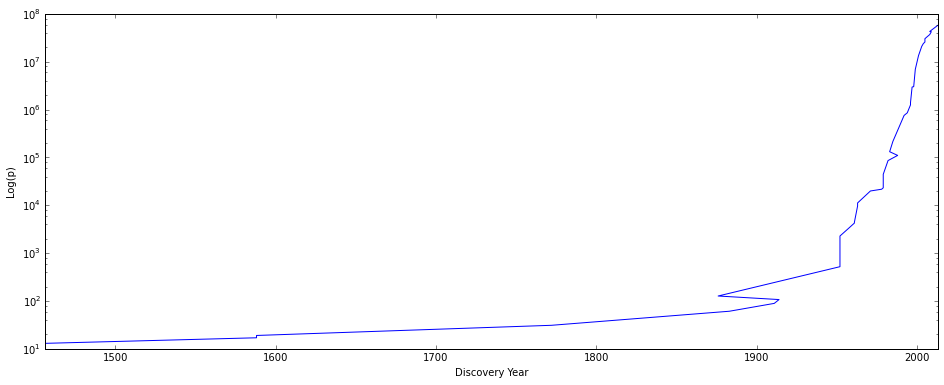

In [3]:
ax = mersenne_history.plot(logy=True, legend=False, figsize=(16, 6))
ax.set_xlabel('Discovery Year')
ax.set_ylabel('Log(p)')

# Lucas Lehmer Test

Mersenne numbers can be tested if they are prime using a simple test. Specifically, $M_p$ is prime if and only if $L_{p-2} = 0$ where $p>2$ and

$$L_n=
\begin{cases}
4 & n=0
\\
L_{n-1}^2-2 \bmod{M_p}& n > 0
\end{cases}$$

The proof relies on the fact that if $\omega = 2 - \sqrt{3}$ and  $\bar{\omega} = 2 + \sqrt{3}$, then

$$L_n = \omega^{2^{n-1}} + \bar{\omega}^{2^{n-1}} \bmod{M_p} $$

The rest relies on looking at the order of the field extension $\mathbb{Z_q}[\sqrt{3}]$, utilizing some group theory then assuming $q$ is a factor of $M_p$ leading to a contradiction.


# Complexity

* The Lucas Lehmer Test is O(p^3) or better.

# Implementations

Back in 1997 when I first looked at this problem I used Maple. As you can see my approach was somewhat naive. For instance, 
I allocated a whole array to store the complete sequence.

```
merse1 := proc(x)
    local L,i;
        L := array(0 .. x-2);
        L[1] := 4;
        for i from 2 to x-2 do 
            L[i] := (L[i-1]^2-2) mod (2^x-1) 
        od;
        if L[x-1] = 0 then 
            print(prime) 
        fi
end
```

My original notes suggest that it took my university batch scheduler at the time 17 hours to test all the Mersenne primes for 23209 and less. It's worth noting that $M_{23209}$ has 6,987 digits! 

Now that sounds like an easy challenge to beat!

In [21]:
mersenne_test_data = [3, 5, 7, 13, 17, 19, 31, 61, 89, 107, 127, 
                      521, 607, 1279, 2203, 2281, 3217, 4253, 4423, 
                      9689, 9941, 11213, 19937, 21701, 23209]

# Plain Python

Initially it's always worth trying this using simple python.

In [9]:
def merse2(x):
    L = 4
    for i in range (2, x):
        L = ((L**2-2) % (2**x-1))
    return "prime" if L == 0 else "comp"

In [10]:
%%timeit -n1 -r1
[merse2(n) for n in mersenne_test_data]

1 loops, best of 1: 5min 30s per loop


# Optimized with GMP's mpz

Python implements it's own big integer type. It's not particularly efficient. One easy optimization is to use GNU multi precision library. 

In [11]:
import gmpy2
from gmpy2 import mpz

In [14]:
def merse3(x):
    L = mpz(4)
    for i in range (2, x):
        L = ((L**2-2) % (2**x-1))
    return "prime" if L == 0 else "comp"

In [15]:
%%timeit -n1 -r1
[merse3(n) for n in mersenne_test_data]

1 loops, best of 1: 1min 8s per loop


# Additional optimization with Cython

We're still bound by Python's loop over i. Python will maintain a significant stack. A simple way around this is to use Cython.

In [12]:
%load_ext Cython

In [13]:
%%cython
import gmpy2
from gmpy2 import mpz

def merse4(int x):
    L = mpz(4)
    cdef int i = 2
    while i < x:
        L = ((L**2-2) % (2**x-1))
        i += 1
    return "prime" if L == 0 else "comp"

In [23]:
%%timeit -n1 -r1
[merse4(n) for n in mersenne_test_data]

1 loops, best of 1: 123 ms per loop


# What is happening under the hood?

* Modern CPUs can only carry out integer multiplications on typical word sizes such as 32 or 64 bits.
* Larger products are performed by splitting each multiplicand $n$ into vectors ${ d_i }$ of smaller word size or base $B$ where the following is true $$n = \sum_{i=0}^{N} d_i B^i$$

In [5]:
from math import ceil
from sympy import log
def to_words(n, length = None, base=10):
    """ splits an integer into smaller words with padding for result to be of length """
    words = []
    if log(base, 2) % 8 == 0:
        bytes_per_word = int(log(base, 2)/8)
        n_bytes = n.to_bytes(ceil(n.bit_length()/8), 'little')
        padding_bytes = (bytes_per_word - len(n_bytes)) % bytes_per_word
        n_bytes_padded = list(n_bytes) + [0] * padding_bytes
        chunked = [ n_bytes_padded[i:i+bytes_per_word] for i in range(0, len(n_bytes_padded), bytes_per_word)]
        words = [sum([c*2**(8*i) for i,c in enumerate(byte_list)]) for byte_list in chunked]
    elif log(base, 10) % 1 == 0:
        digits_per_word = int(log(base, 10))
        n_digits = [int(i) for i in list(str(n))][::-1]
        padding_digits = (digits_per_word - len(n_digits)) % digits_per_word
        n_digits_padded = list(n_digits) + [0] * padding_digits
        chunked = [ n_digits_padded[i:i+digits_per_word] for i in range(0, len(n_digits_padded), digits_per_word)]
        words = [sum([c*10**i for i,c in enumerate(digit_list)]) for digit_list in chunked]
    else:
        raise ValueError("base must be power of 10 or power of 2**8")
    return words + [0] * (length - len(words)) if length else words

In [2]:
to_words(12345678912345678912345678, base=10)

[8, 7, 6, 5, 4, 3, 2, 1, 9, 8, 7, 6, 5, 4, 3, 2, 1, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [29]:
to_words(12345678912345678912345678, base=2**32)

* We can then use polynomial multiplication to calculate the product of integers, i.e. 
$$n \times m = \sum_{i=0}^{N} \sum_{j=0}^{M} d_i e_j B^{i+j}   $$

* If we ignore additions, we see has complexity $\mathcal{O}(n^2)$
* Along with carry, this forms the basis of long multiplication

# Long Multiplication

$$
\begin{align*}
d_N d_{N-1} .. d_1 d_0 && \\
\underline{\times \quad e_M e_{M-1} .. e_1 e_0} && \\
x_{N',0} x_{N'-1,0} .. x_{1,0} x_{0,0} && (e_0 \times n \text{, shifted by }B^0) \\
x_{N'',1} x_{N''-1,1} .. x_{1,1} x_{0,1} \quad && (e_1 \times n \text{, shifted by }B^1) \\
.. \\
\underline{x_{N''',M} x_{N'''-1,M} .. x_{1,M} x_{0,M} \quad \quad}&& (e_M \times n \text{, shifted by }B^M) \\
x_{N''''} x_{N''''-1} .. x_1 x_0 && \\
\end{align*}
$$


# OpenCL and Long Multiplication

* OpenCL is a heterogeneous parallel computing framework.
* It can utilise either CPUs or GPUs.
* Long multiplication is well suited to parrallel computing.
* Can we apply this simple algorithm using GPUs? 

# OpenCL and Long Multiplication - Attempt 1

* Calculate each word product combination.

```c
kernel void product_kernel( 
    global const uint *x_g, const uint x_size_g,
    global const uint *y_g, const uint y_size_g,
    global uint *z_g, const uint z_size_g,
	global uint *semaphore_g, const uint semaphore_size_g
) {
    int i = get_local_id(0);
    int j = get_local_id(1);
   
    word_result prod = word_product(x_g[i], y_g[j]);

	uint overflow1 = prod.hi;
	uint overflow2 = update_result(semaphor_g, z_g, i + j, prod.lo);

	for (int r = 1; r < z_size_g - (i + j); r++) { // r < z_size_g -i -j		
		overflow1 = update_result(semaphor_g, z_g, i + j + r, overflow1);
		overflow2 = update_result(semaphor_g, z_g, i + j + r, overflow2);
		if (!(overflow1 || overflow2))
			break;
	}
}
```

* Use spinlock to process overflow / carry.

```c
uint update_result(global uint * semaphore_g, global uint *z_g, uint index, uint value) {
	get_semaphore(&semaphore_g[index]);
	uint preval = z_g[index];
	word_result sum = word_sum(z_g[index], value);
	z_g[index] = sum.lo;
	release_semaphore(&semaphore_g[index]);
	return sum.hi;
}
```

* Works okay on Intel CPU device.
* Fails on Nvida GPU most likely because of it's parallel thread execution model.

# OpenCL and Long Multiplication - Attempt 2

* Calculate all pairwise products storing results in stacks.
* Sum stacks in separate accumulation kernel.

```c
void append_to_work_array(global uint *z_array_g, global uint *z_array_index_g, const uint z_array_ncols_g, uint index, uint value) {
	uint row = atomic_inc(&z_array_index_g[index]);
	z_array_g[row*z_array_ncols_g + index] = value;
}
```

In [14]:
import numpy as np
import pyopencl as cl
import pyopencl.tools
import random
import os

os.environ['PYOPENCL_CTX'] = "0"
os.environ['CPU_MAX_COMPUTE_UNITS'] = '1'
os.environ['PYOPENCL_COMPILER_OUTPUT'] = '1'
os.environ['PYOPENCL_NO_CACHE'] = '1'

ctx = cl.create_some_context(interactive=True)
queue = cl.CommandQueue(ctx)

In [2]:
%reload_ext pyopencl.ipython_ext

In [15]:
from math import log, ceil
def to_words(n, base=2**32, dtype=np.uint32, block_size = None):
    """ splits an integer array of x bit words """
    words = []
    bytes_per_word = int(log(base, 2)/8)
    n_bytes = n.to_bytes(ceil(n.bit_length()/8), 'little')
    padding_bytes = (bytes_per_word - len(n_bytes)) % bytes_per_word
    n_bytes_padded = list(n_bytes) + [0] * padding_bytes
    chunked = [ n_bytes_padded[i:i+bytes_per_word] for i in range(0, len(n_bytes_padded), bytes_per_word)]
    words = [sum([c*2**(8*i) for i,c in enumerate(byte_list)]) for byte_list in chunked]
    if block_size:
        words = words + [0] * (block_size - (len(words) % block_size))
    return np.array(words).astype(dtype)

In [7]:
%%cl_kernel

// UINT_MAX
#define MAXINT32 4294967295U
// USHRT_MAX
#define MAXINT16 65535
#define WORDBITS 32
#define HI16(x) (x >> WORDBITS/2)
#define LO16(x) (x & MAXINT16)

typedef struct {
	uint lo;
	uint hi; // carry
} word_result;


word_result word_sum(uint x, uint y) {
	word_result wr;
	if (x > MAXINT32 - y) { // overflow
		wr.lo = x - (MAXINT32 - y) - 1; // x + y % (MAXINT32+1)
		wr.hi = 1;
	}
	else {
		wr.lo = x + y;
		wr.hi = 0;
	}
	return wr;
}

// see http://stackoverflow.com/questions/1815367/multiplication-of-large-numbers-how-to-catch-overflow
word_result word_product(uint x, uint y) {
	word_result wr;

	uint x_hi = HI16(x);
	uint x_lo = LO16(x);
	uint y_hi = HI16(y);
	uint y_lo = LO16(y);

	uint z = x_lo * y_lo;
	if (!(x_hi || y_hi)) {
		wr.lo = z;
		wr.hi = 0;
	}
	else {
		uint s0 = LO16(z);

		z = x_hi * y_lo + HI16(z);
		uint s1 = LO16(z);
		uint s2 = HI16(z);

		z = s1 + x_lo * y_hi;
		s1 = LO16(z);

		z = s2 + x_hi * y_hi + HI16(z);
		s2 = LO16(z);
		uint s3 = HI16(z);

		wr.lo = s1 << 16 | s0;
		wr.hi = s3 << 16 | s2;
	}
	return wr;
}


void append_to_work_array(global uint *z_array_g, global uint *z_array_index_g, const uint z_array_ncols_g, uint index, uint value) {
	uint row = atomic_inc(&z_array_index_g[index]);
	z_array_g[row*z_array_ncols_g + index] = value;
}

kernel void product_kernel(
	global const uint *x_g, const uint x_size_g,
	global const uint *y_g, const uint y_size_g,
	global uint *z_array_g, const uint z_array_nrows_g, const uint z_array_ncols_g,
	global uint *z_array_index_g
	) {

	int i = get_global_id(0);
	int j = get_global_id(1);

	if (x_g[i] && y_g[i]) {
		word_result prod = word_product(x_g[i], y_g[j]);
		append_to_work_array(z_array_g, z_array_index_g, z_array_ncols_g, i + j, prod.lo);
		append_to_work_array(z_array_g, z_array_index_g, z_array_ncols_g, i + j + 1, prod.hi);
	}
}

kernel void accumulate_kernel(
	global uint *z_array_g, const uint z_array_nrows_g, const uint z_array_ncols_g,
	global uint *z_array_index_g,
	global uint *z_g, const uint z_size_g
	) {

	for (uint i = 0; i < z_array_ncols_g; i++) {
		for (uint j = 0; j < z_array_index_g[i]; j++) {
			word_result sum = word_sum(z_g[i], z_array_g[j*z_array_ncols_g + i]);
			z_g[i] = sum.lo;
			if (sum.hi != 0) {
				z_g[i + 1] += sum.hi; // as always only +1 (<<base) thus save allocating mem
			}
		}
	}
}

```c
kernel void product_kernel(
	global const uint *x_g, const uint x_size_g,
	global const uint *y_g, const uint y_size_g,
	global uint *z_array_g, const uint z_array_nrows_g, const uint z_array_ncols_g,
	global uint *z_array_index_g
	) {

	int i = get_global_id(0);
	int j = get_global_id(1);

	if (x_g[i] && y_g[i]) {
		word_result prod = word_product(x_g[i], y_g[j]);
		append_to_work_array(z_array_g, z_array_index_g, z_array_ncols_g, i + j, prod.lo);
		append_to_work_array(z_array_g, z_array_index_g, z_array_ncols_g, i + j + 1, prod.hi);
	}
}
```

In [10]:
block_size = 32 # nvidia 32
ws = 120 * block_size # nvidia limit = 7 x 32

base = 2**32
#x = 123456789123456789
#y = 112233445566778899
x = random.randint(1,base**ws)
y = random.randint(1,base**ws)
x_w = to_words(x, base=base, dtype=np.uint32, block_size = block_size)
y_w = to_words(y, base=base, dtype=np.uint32, block_size = block_size)
z_w = np.zeros(len(x_w)+len(y_w), dtype=np.uint32)
z_array = np.zeros((2*ws-1,len(x_w)+len(y_w)), dtype=np.uint32)
z_array_index = np.zeros((len(x_w)+len(y_w)), dtype=np.uint32)

mf = cl.mem_flags
x_g = cl.Buffer(ctx, mf.READ_ONLY | mf.COPY_HOST_PTR, hostbuf=x_w)
y_g = cl.Buffer(ctx, mf.READ_ONLY | mf.COPY_HOST_PTR, hostbuf=y_w)
z_g = cl.Buffer(ctx, mf.READ_WRITE | mf.COPY_HOST_PTR, hostbuf=z_w)
z_array_g = cl.Buffer(ctx, mf.READ_WRITE | mf.COPY_HOST_PTR, hostbuf=z_array) # work area
z_array_index_g = cl.Buffer(ctx, mf.READ_WRITE | mf.COPY_HOST_PTR, hostbuf=z_array_index) # work area index

product_kernel.set_args(
    x_g, np.uint32(len(x_w)),
    y_g, np.uint32(len(y_w)),
    z_array_g, np.uint32(z_array.shape[0]), np.uint32(z_array.shape[1]),
    z_array_index_g
)

accumulate_kernel.set_args(
    z_array_g, np.uint32(z_array.shape[0]), np.uint32(z_array.shape[1]),
    z_array_index_g,
    z_g, np.uint32(len(z_w))
)

#pk_ev = cl.enqueue_nd_range_kernel(queue, product_kernel, (len(x_w),len(y_w),), (block_size,block_size,))
#ak_ev = cl.enqueue_task(queue, accumulate_kernel, wait_for=[pk_ev])
#ak_ev.wait()

#cl.enqueue_copy(queue, z_array, z_array_g)
#cl.enqueue_copy(queue, z_w, z_g)

# How does this compare to standard libraries?

* Plain python - most likely same algorithm

In [20]:
%%timeit -r1 -n5
x*y

5 loops, best of 1: 7.31 ms per loop


* GMP's mpz - highly optimized using many different algorithms

In [13]:
import gmpy2
from gmpy2 import mpz
x_mpz = mpz(x)
y_mpz = mpz(y)

In [18]:
%%timeit -r1 -n5
x_mpz*y_mpz

5 loops, best of 1: 710 µs per loop


* OpenCL on Nvidia GEForce GPU

In [19]:
%%timeit -r1 -n5
pk_ev = cl.enqueue_nd_range_kernel(queue, product_kernel, (len(x_w),len(y_w),), (block_size,block_size,))
ak_ev = cl.enqueue_task(queue, accumulate_kernel, wait_for=[pk_ev])

5 loops, best of 1: 88.9 µs per loop


* Is this fair? In OpenCL example we excluded up/download times
* Looks suspicious and should really test more inputs..
* Can we improve on this?

# Polynomial representations

Several ways to fix a polynomial $f(t)$ of degree $k$ using $k+1$ parameters

| Coefficient Representation | Root Representation | Unique Point Value Representation |
|:-:|:-:|:-:|
| $\sum_{i=0}^k a_i t^i$ | $a_0\prod_{i=1}^{k-1} (t-a_i)$ | $\{ t_i, f(t_i) \}_{i=0}^k$ |
| $\{a_i\}_{i=0}^k$ | $\{a_i\}_{i=0}^k$ | $\{ f(t_i) \}_{i=0}^k$ |
| $\{c_i\} = \{a_i + b_i\}$ | Non trivial | $\{ h(t_i) \} = \{ f(t_i) + g(t_i) \}$ |
| $\{c_i\} = \{ \sum _{j=0}^{i} a_j b_{i-j} \}$ | $\{c_i\} = \{a_i\} \cup \{b_i\}$ |  $\{ h(t_i) \} = \{ f(t_i) \times g(t_i) \}$ |

Note that Unique Point Value Representation allows polynomials to be operated on component-wise.

In [2]:
from IPython.display import Latex
import sympy as sp
import sympy.matrices as spm
sp.init_session(quiet=True, ipython=True) 

IPython console for SymPy 0.7.7.dev (Python 3.4.3-64-bit) (ground types: gmpy)


In [3]:
k = 3
D = 2*k - 1
t = sp.symbols("t")
# vectors
x = Matrix(sp.symbols(["x%s" % i for i in range(k)]))
y = Matrix(sp.symbols(["y%s" % i for i in range(k)]))
z = Matrix(sp.symbols(["z%s" % i for i in range(D)]))
# polys
x_t = sp.Poly(x[::-1], t)
y_t = sp.Poly(y[::-1], t)
z_t = sp.Poly(z[::-1], t)
# linear system
x_d = [x_t(i) for i in range(1-k,k-1,1)] + [x_t.coeffs()[0]]
y_d = [y_t(i) for i in range(1-k,k-1,1)] + [y_t.coeffs()[0]]
z_d = [z_t(i) for i in range(1-k,k-1,1)] + [z_t.coeffs()[0]]
# matrices
x_m = sp.Matrix([[x_d[j].coeff(i) for i in x] for j in range(D)])
y_m = sp.Matrix([[y_d[j].coeff(i) for i in y] for j in range(D)])
z_m = sp.Matrix([[z_d[j].coeff(i) for i in z] for j in range(D)])

# Unique Point Value Representation

* Two numbers can be multiplied elementwise in $\mathcal{O}(n)$. 
* We still need to transform from/to coefficient representation form. 
* This requires evaluating polynomials at several points.
* Standard monomial evaluation $\sum_{i=0}^k a_i t^i$ is $\mathcal{O}(n^2)$.
* Can be reduced to $\mathcal{O}(n)$ by Horner's method by evaluating $a_0 + t(a_1 + t(a_2 + \cdots + t(a_{k-1} + a_k t)))$.



In [4]:
_x_t = Latex("$%s$" % latex(x_t.as_expr()))
_x_m_x = Latex(r"$%s = %s %s$" % tuple([latex(i) for i in (x_m*x, x_m, x)]))
_z_xy = Latex(r"$%s %s = %s %s \odot %s %s$" % tuple([latex(i) for i in (z_m, z, x_m, x, y_m, y)]))
_z_xy

<IPython.core.display.Latex object>

# Toom Cook Algorithm

* Uses point representation & splits multiplicand into $k$ words.
* Overcomes complexity by careful choice of evaluation points.
* Typically, $t=..,-2,-1,0,1,..,\infty$ where evaluation at $\infty$ equates to highest coefficient.
* For $k=3$, the $2^{nd}$ degree polynomial {{_x_t}}, evaluates to:


{{_x_m_x}}

# Multiplication using Toom Cook (k=3)

* Multiplying two $k$ length polynomials results in one of length $2k-1$.
* Applying same evaluation points to resultant polynomial gives:

{{_z_xy}}


Where $\odot$ means elementwise multiplication and inverting matrix on LHS will allows us to calculate words $z_i$.

In [39]:
# wiki example
base = 10**8
n_x = 1234567890123456789012
n_y = 987654321987654321098
words_x = Matrix([sp.Integer(i) for i in to_words(n_x, base=base)])
words_y = Matrix([sp.Integer(i) for i in to_words(n_y, base=base)])
words_z = z_m.inv()*((x_m*words_x).multiply_elementwise(x_m*words_y))
n_z = z_t.subs(zip(z,words_z)).subs(t,base)
# assert: n_z - (n_x * n_y)
_nx_ny = Latex(r"$%s \times %s$" % (n_x, n_y))
_z_xy_1 = Latex(r"$%s %s = %s %s \odot %s %s$" % tuple([latex(i) for i in (z_m, z, x_m, words_x, y_m, words_y)]))
_z_words = Latex(r"$%s = %s$" % tuple([latex(i) for i in (z, words_z)]))
_nz = Latex(r"$%s$" % (n_z))

# Toom Cook Example

$n_x \times n_y = $ {{_nx_ny}}

In point representation:

{{_z_xy_1}}


Inverting LHS gives

{{_z_words}}

Multiplying each element by corresponding power base and summing returns:

{{_nz}}

# Lucas Lehmer Test on OpenCL

Can we perform the test using our GPU?

* Utilise long multiplication as before, this can be easily parallelized.
* Simplify process by only working with postive numbers.
* Emulate subtraction by 2 by adding $M_n-2$

How can we do modulo operations?


# Fast modulo with $M_n$

There are similarities when doing modulo arithmetic $10^k-1$ in denary with $2^k-1$ and binary. Consider any number, say 101254 and modulo it 99. Note that:

$$101254 \bmod{99} = (1012 \times 100 + 54) \bmod{99}$$ 
$$ = (1012 \times 100) \bmod 99 + 54 \bmod{99}$$
$$ = 1012 + 54 \bmod{99}$$
$$= 1066 \bmod{99}$$

Again, we repeat the process:

$$1066 \bmod{99} = 10*100 + 66$$
$$=10*100 \bmod 99 +66$$
$$=10 + 66 \bmod 99$$
$$= 76$$

We can apply similar logic to numbers modulo Mersenne numbers:

$$11000101110000110 \bmod{1111111} = (1100010111 + 0000110) \bmod{1111111}$$
$$ = 1100011101 \bmod {1111111} = (110 + 0011101) \bmod{1111111}$$
$$ = 100011$$

Most importantly the whole procedure is parallelizable.

In [4]:
%%cl_kernel

// UINT_MAX
#define MAXINT32 4294967295U
// USHRT_MAX
#define MAXINT16 65535
#define WORDBITS 32
#define HI16(x) (x >> WORDBITS/2)
#define LO16(x) (x & MAXINT16)


typedef struct {
  uint word_count;
  uint p;
  uint lhs_word_count;
  uint lhs_bit_count;
  uint MN;
  int mn_cmp; // 0 ~ equal; -1 ~ less than, 1 ~ greater than
  uint do_add; // 0 ~ no, 1 ~ yes
  int mn_cmp_eq;
  int mn_cmp_gt;
} param_struct;


typedef struct {
	uint lo;
	uint hi; // carry
} word_result;

word_result word_sum(uint x, uint y) {
	word_result wr;
	if (x > MAXINT32 - y) { // overflow
		wr.lo = x - (MAXINT32 - y) - 1; // x + y % (MAXINT32+1)
		wr.hi = 1;
	}
	else {
		wr.lo = x + y;
		wr.hi = 0;
	}
	return wr;
}

// see http://stackoverflow.com/questions/1815367/multiplication-of-large-numbers-how-to-catch-overflow
word_result word_product(uint x, uint y) {
	word_result wr;

	uint x_hi = HI16(x);
	uint x_lo = LO16(x);
	uint y_hi = HI16(y);
	uint y_lo = LO16(y);

	uint z = x_lo * y_lo;
	if (!(x_hi || y_hi)) {
		wr.lo = z;
		wr.hi = 0;
	}
	else {
		uint s0 = LO16(z);

		z = x_hi * y_lo + HI16(z);
		uint s1 = LO16(z);
		uint s2 = HI16(z);

		z = s1 + x_lo * y_hi;
		s1 = LO16(z);

		z = s2 + x_hi * y_hi + HI16(z);
		s2 = LO16(z);
		uint s3 = HI16(z);

		wr.lo = s1 << 16 | s0;
		wr.hi = s3 << 16 | s2;
	}
	return wr;
}

void append_to_work_array(
	const uint word_count, 
	global uint *work_g, 
	global uint *workindex_g, 
	uint index, uint value
) {
	uint row = atomic_inc(&workindex_g[index]);
	work_g[row*word_count + index] = value;
}

kernel void initialise_kernel(
	global param_struct *params_g
	) {
	params_g->lhs_word_count = params_g->p / 32; // same as floor for +ve p
	params_g->lhs_bit_count = params_g->p % 32;
	params_g->MN = (1 << params_g->lhs_bit_count) - 1; // 2^n - 1
}

// x^2 -> wa
kernel void square_kernel(
	global param_struct *params_g,
	global const uint *x_g,
	global uint *work_g,
	global uint *workindex_g
) {
	int i = get_global_id(0);
	int j = get_global_id(1);

	if (x_g[i] && x_g[j]) {
		word_result prod = word_product(x_g[i], x_g[j]);
		//printf("tid(%i,%i): lo,hi %u, %u\n", i, j, prod.lo, prod.hi);
		append_to_work_array(params_g->word_count, work_g, workindex_g, i + j, prod.lo);
		append_to_work_array(params_g->word_count, work_g, workindex_g, i + j + 1, prod.hi);
	}
}

// wa -> x, carry
kernel void accumulate_kernel(
	global param_struct *params_g,
	global uint *work_g,
	global uint *workindex_g,
	global uint *x_g, 
	global uint *carry_g
) {
	int i = get_global_id(0);

	carry_g[0] = 0; // just in case, it's been used previously
	params_g->do_add = 1; // ensure x and carry added

	// sum column in z_array
	uint lo = 0;
	uint hi = 0;

	for (uint j = 0; j < workindex_g[i]; j++) {
		word_result sum = word_sum(lo, work_g[j*params_g->word_count + i]);
		lo = sum.lo;
		if (sum.hi != 0)
			hi += sum.hi; // as always only +1 (<<base) thus save allocating mem
	}
	workindex_g[i] = 0; // prepare for next use

	x_g[i] = lo;
	carry_g[i + 1] = hi;
}

// x+y -> x
kernel void add_kernel_single(
	global param_struct *params_g,
	global uint *x_g,
	global const uint *y_g
) { 
	if (params_g->do_add) {
		uint carry = 0;
		for (uint i = 0; i < params_g->word_count; i++) {
			uint x = x_g[i];
			uint y = y_g[i];

			if (carry) {
				word_result sum2 = word_sum(x, carry);
				x = sum2.lo;
				carry = sum2.hi;
			}

			if (y) {
				word_result sum1 = word_sum(x, y);
				x = sum1.lo;
				carry += sum1.hi;
			}

			x_g[i] = x;
		}
	}
}

int mn_compare(
	global param_struct *params_g
) {
	return params_g->mn_cmp_eq ? 0 : params_g->mn_cmp_gt ? 1 : -1;
}

kernel void mn_compare_kernel(
	global param_struct *params_g,
	global uint *x_g
) {
	if (params_g->do_add) {
		int i = get_global_id(0);

		params_g->mn_cmp_eq = 1;
		params_g->mn_cmp_gt = 0;

		barrier(CLK_GLOBAL_MEM_FENCE|CLK_LOCAL_MEM_FENCE);

		uint lhs_word_count = params_g->lhs_word_count;
		uint MN = params_g->MN;
		uint lhs_bit_count = params_g->lhs_bit_count;

		uint x = x_g[i];
	
		if (i < lhs_word_count)
			atomic_and(&params_g->mn_cmp_eq,  (x == MAXINT32));
		else if (i == lhs_word_count) {
			atomic_and(&params_g->mn_cmp_eq, (x == MN));
			atomic_or(&params_g->mn_cmp_gt, (32 - clz(x) > lhs_bit_count));
		}
		else if (i > lhs_word_count) {
			atomic_and(&params_g->mn_cmp_eq, (x == 0));
			atomic_or(&params_g->mn_cmp_gt, (x != 0));
		}

		barrier(CLK_GLOBAL_MEM_FENCE | CLK_LOCAL_MEM_FENCE);
		params_g->mn_cmp = params_g->mn_cmp_eq ? 0 : params_g->mn_cmp_gt ? 1 : -1;
	}
}

// wa += (mp-2)
// just add parts to work_array
kernel void sub2_kernel(
	global param_struct *params_g,
	global uint *work_g,
	global uint *workindex_g
) {
	int i = get_global_id(0);
	uint temp = i == 0 ? MAXINT32 - 2 : i < params_g->lhs_word_count ? MAXINT32 : i == params_g->lhs_word_count ? params_g->MN : 0;
	append_to_work_array(params_g->word_count, work_g, workindex_g, i, temp);
}


kernel void modmp_kernel_multi2_1(
	global param_struct *params_g,
	global uint *x_g,
	global uint *carry_g
	) {
	int i = get_global_id(0);

	// put rhs in carry_g

	switch (params_g->mn_cmp) {
	//switch (mn_compare(params_g)) {
	case 1:
		params_g->do_add = 1;
		if (i < params_g->word_count - params_g->lhs_word_count - 1) {
			uint ms = x_g[params_g->lhs_word_count + i] >> params_g->lhs_bit_count;
			uint ls = x_g[params_g->lhs_word_count + 1 + i] & params_g->MN;
			carry_g[i] = (ls << (32 - params_g->lhs_bit_count) | ms);
		}
		else
			carry_g[i] = 0;
		break;
	case 0: // just reset to zero if eq 0 mod mn
		x_g[i] = 0;
		break;
	case -1:
		params_g->do_add = 0;
		break;
	}

}

kernel void modmp_kernel_multi2_2(
	global param_struct *params_g,
	global uint *x_g,
	global uint *carry_g
	) {
	int i = get_global_id(0);

	// leave lhs in x_g

	switch (params_g->mn_cmp) {
	//switch (mn_compare(params_g)) {
	case 1:
		params_g->do_add = 1;
		if (i == params_g->lhs_word_count) {
			uint ls = x_g[i] & params_g->MN;
			x_g[i] = ls;
		}
		else if (i > params_g->lhs_word_count)
			x_g[i] = 0;
		break;
	default:
		params_g->do_add = 0;
	}

}

In [21]:
import numpy as np
import pyopencl as cl
import pyopencl.tools
import random
import os, os.path
from math import log, ceil

class LucasLehmerTest(object):

    def __init__(self):
        self.ctx = ctx
        self.queue = queue

    def to_words(self, n, base=2**32, dtype=np.uint32, block_size = None, min_blocks = None):
        """ splits an integer array of x bit words """
        words = []
        bytes_per_word = int(log(base, 2)/8)
        n_bytes = n.to_bytes(ceil(n.bit_length()/8), 'little')
        padding_bytes = (bytes_per_word - len(n_bytes)) % bytes_per_word
        n_bytes_padded = list(n_bytes) + [0] * padding_bytes
        chunked = [ n_bytes_padded[i:i+bytes_per_word] for i in range(0, len(n_bytes_padded), bytes_per_word)]
        words = [sum([c*2**(8*i) for i,c in enumerate(byte_list)]) for byte_list in chunked]
        if block_size:
            words = words + [0] * (block_size - (len(words) % block_size))
            if min_blocks:
                words = words + [0] * (block_size * min_blocks - len(words))
        return np.array(words).astype(dtype)

    def prepare(self, p = 1279):
        self.p = p

        self.block_size = 32 # nvidia 32
        bits_per_word = 32
        self.base = 2**bits_per_word
        # n < 2^(bpw)^wc < (2^p - 1)^2 < 2^(2p) -> wc < 2*p / bpw; wc = bs * ceil(2*p / bpw / bs)
        self.word_count = self.block_size * ceil(2*p / bits_per_word / self.block_size)
        min_blocks = int(self.word_count / self.block_size)

        print("p: %s; bs: %s; wc: %s" % (self.p, self.block_size, self.word_count))


        self.param_struct = np.dtype([("word_count", np.uint32), ("p", np.uint32), 
                                 ("lhs_word_count", np.uint32), ("lhs_bit_count", np.uint32), ("MN", np.uint32),
                                 ("mn_cmp", np.int32), ("do_add", np.uint32),
                                 ("mn_cmp_eq", np.int32), ("mn_cmp_gt", np.int32)
                                 ])
        
        # in theory should adjust to device padding
        #param_struct, param_struct_c_decl = cl.tools.match_dtype_to_c_struct(self.ctx.devices[0], "param_struct", param_struct)
        #param_struct = cl.tools.get_or_register_dtype("param_struct", param_struct)

        params = np.empty(1, self.param_struct)
        params[0]["word_count"] = self.word_count
        params[0]["p"] = self.p

        x_w = self.to_words(4, base=self.base, dtype=np.uint32, block_size = self.block_size, min_blocks = min_blocks)
        work = np.zeros((self.word_count,self.word_count), dtype=np.uint32)
        workindex = np.zeros(self.word_count, dtype=np.uint32)
        carry = np.zeros(self.word_count, dtype=np.uint32)

        mf = cl.mem_flags
        self.x_g = cl.Buffer(self.ctx,  mf.READ_WRITE | mf.COPY_HOST_PTR, hostbuf=x_w)
        self.work_g = cl.Buffer(self.ctx, mf.READ_WRITE | mf.COPY_HOST_PTR, hostbuf=work) # work area
        self.workindex_g = cl.Buffer(self.ctx, mf.READ_WRITE | mf.COPY_HOST_PTR, hostbuf=workindex) # work area index
        self.carry_g = cl.Buffer(self.ctx, mf.READ_WRITE | mf.COPY_HOST_PTR, hostbuf=carry) # carry
        self.params_g = cl.Buffer(self.ctx, mf.READ_WRITE | mf.COPY_HOST_PTR, hostbuf=params)

        self.initialise_kernel = initialise_kernel
        self.initialise_kernel.set_args(
            self.params_g
        )

        self.square_kernel = square_kernel
        self.square_kernel.set_args(
            self.params_g,
            self.x_g, 
            self.work_g,
            self.workindex_g
        )

        self.accumulate_kernel = accumulate_kernel
        self.accumulate_kernel.set_args(
            self.params_g,
            self.work_g,
            self.workindex_g,
            self.x_g,
            self.carry_g
        )

        self.add_kernel_single = add_kernel_single
        self.add_kernel_single.set_args(
            self.params_g,
            self.x_g,
            self.carry_g
        )

        self.mn_compare_kernel = mn_compare_kernel
        self.mn_compare_kernel.set_args(
            self.params_g,
            self.x_g
        )
        
        self.sub2_kernel = sub2_kernel
        self.sub2_kernel.set_args(
            self.params_g,
            self.work_g,
            self.workindex_g
        )

        self.modmp_kernel_multi2_1 = modmp_kernel_multi2_1
        self.modmp_kernel_multi2_1.set_args(
            self.params_g,
            self.x_g,
            self.carry_g
        )

        self.modmp_kernel_multi2_2 = modmp_kernel_multi2_2
        self.modmp_kernel_multi2_2.set_args(
            self.params_g,
            self.x_g,
            self.carry_g
        )

    def test(self):
        ev = cl.enqueue_task(self.queue, self.initialise_kernel)

        ev = cl.enqueue_nd_range_kernel(self.queue, self.square_kernel, (self.word_count,self.word_count,), (self.block_size,self.block_size,), wait_for=[ev])
        ev = cl.enqueue_nd_range_kernel(self.queue, self.sub2_kernel, (self.word_count,), (self.block_size,), wait_for=[ev])
        ev = cl.enqueue_nd_range_kernel(self.queue, self.accumulate_kernel, (self.word_count,), (self.block_size,), wait_for=[ev])
        ev = cl.enqueue_task(self.queue, self.add_kernel_single, wait_for=[ev])
        ev = cl.enqueue_nd_range_kernel(self.queue, self.mn_compare_kernel, (self.word_count,), (self.block_size,), wait_for=[ev])
        ev = cl.enqueue_nd_range_kernel(self.queue, self.modmp_kernel_multi2_1, (self.word_count,), (self.block_size,), wait_for=[ev])
        ev = cl.enqueue_nd_range_kernel(self.queue, self.modmp_kernel_multi2_2, (self.word_count,), (self.block_size,), wait_for=[ev])
        ev = cl.enqueue_task(self.queue, self.add_kernel_single, wait_for=[ev])
        ev = cl.enqueue_nd_range_kernel(self.queue, self.mn_compare_kernel, (self.word_count,), (self.block_size,), wait_for=[ev])
        ev = cl.enqueue_nd_range_kernel(self.queue, self.modmp_kernel_multi2_1, (self.word_count,), (self.block_size,), wait_for=[ev])
        ev = cl.enqueue_nd_range_kernel(self.queue, self.modmp_kernel_multi2_2, (self.word_count,), (self.block_size,), wait_for=[ev])
        ev = cl.enqueue_task(self.queue, self.add_kernel_single, wait_for=[ev])
        ev = cl.enqueue_nd_range_kernel(self.queue, self.mn_compare_kernel, (self.word_count,), (self.block_size,), wait_for=[ev])

        for i in range(3, self.p):
            ev = cl.enqueue_nd_range_kernel(self.queue, self.square_kernel, (self.word_count,self.word_count,), (self.block_size,self.block_size,), wait_for=[ev])       
            ev = cl.enqueue_nd_range_kernel(self.queue, self.sub2_kernel, (self.word_count,), (self.block_size,), wait_for=[ev])
            ev = cl.enqueue_nd_range_kernel(self.queue, self.accumulate_kernel, (self.word_count,), (self.block_size,), wait_for=[ev])
            ev = cl.enqueue_task(self.queue, self.add_kernel_single, wait_for=[ev])
            ev = cl.enqueue_nd_range_kernel(self.queue, self.mn_compare_kernel, (self.word_count,), (self.block_size,), wait_for=[ev])
            ev = cl.enqueue_nd_range_kernel(self.queue, self.modmp_kernel_multi2_1, (self.word_count,), (self.block_size,), wait_for=[ev])
            ev = cl.enqueue_nd_range_kernel(self.queue, self.modmp_kernel_multi2_2, (self.word_count,), (self.block_size,), wait_for=[ev])
            ev = cl.enqueue_task(self.queue, self.add_kernel_single, wait_for=[ev])
            ev = cl.enqueue_nd_range_kernel(self.queue, self.mn_compare_kernel, (self.word_count,), (self.block_size,), wait_for=[ev])
            ev = cl.enqueue_nd_range_kernel(self.queue, self.modmp_kernel_multi2_1, (self.word_count,), (self.block_size,), wait_for=[ev])
            ev = cl.enqueue_nd_range_kernel(self.queue, self.modmp_kernel_multi2_2, (self.word_count,), (self.block_size,), wait_for=[ev])
            ev = cl.enqueue_task(self.queue, self.add_kernel_single, wait_for=[ev])
            ev = cl.enqueue_nd_range_kernel(self.queue, self.mn_compare_kernel, (self.word_count,), (self.block_size,), wait_for=[ev])

        z_w = np.zeros(self.word_count, dtype=np.uint32)
        cl.enqueue_copy(self.queue, z_w, self.x_g)

        carry = np.zeros(self.word_count, dtype=np.uint32) 
        cl.enqueue_copy(self.queue, carry, self.carry_g)

        work = np.zeros((self.word_count,self.word_count), dtype=np.uint32)
        workindex = np.zeros(self.word_count, dtype=np.uint32)
        cl.enqueue_copy(self.queue, work, self.work_g)
        cl.enqueue_copy(self.queue, workindex, self.workindex_g)
        
        z = sum([int(x)*self.base**i for i, x in enumerate(z_w)])
        return "prime" if z == 0 else "comp"


# How does this compare?

In [24]:
%%timeit -n 1 -r 1
llt = LucasLehmerTest()
llt.prepare(p=1279)
llt.test()

p: 1279; bs: 32; wc: 96
1 loops, best of 1: 346 ms per loop


In [23]:
%%timeit
merse4(1279)

1000 loops, best of 3: 290 µs per loop


# Post mortem 1

Why doesn't this work well?

* GPU clock speed .7 versus CPU 2.2 GHz
* GPUs well known not to b optimal for integer calculations
* Inability to properly parallelize addition operation

|Kernel Name|Count|Device %|Device Time (µs)|
|-|-:|-:|-:|
|initialise_kernel|1|0|6.38|
|square_kernel|1277|1.88|23,738.43|
|accumulate_kernel|1277|6.26|79,271.30|
|add_kernel_single|3831|23.74|300,572.39|
|mn_compare_kernel|3831|2.14|27,144.41|
|sub2_kernel|1277|4.32|54,720.99|
|modmp_kernel_multi2_1|2554|0.84|10,675.29|
|modmp_kernel_multi2_2|2554|8.54|108,062.32|


# Post mortem 2

* Overhead of queuing kernels and transferring data to GPU

|Name|Count|Time %|Total (µs)|
|-|-:|-:|-:|
|clEnqueueNDRangeKernel|12770|34.13|432,080.73|
|clBuildProgram|1|23.58|298,559.66|
|clEnqueueTask|3832|12.11|153,256.40|
|clCreateContext|1|2.98|37,773.32|
|clEnqueueReadBuffer|4|1.85|23,407.23|
|clReleaseEvent|16606|1.12|14,163.10|
|clReleaseKernel|8|0.82|10,373.87|
|clReleaseCommandQueue|1|0.4|5,079.03|
|clReleaseMemObject|5|0.03|352.016|
|clCreateKernel|8|0.02|220.732|

Potentially cured in OpenCL v2

# Possible improvements?

* Channeling GPU calculations
* Discrete Fourier Transforms
    * Utilise polymonial representaion and Horner method (results in O(n^2))
    * Divide & Conquer algorithms
    * Utilise SSA algorithm
* Use 64 bit arithmetic extensions
* OpenCL v2

# References
* GIMPS - http://www.mersenne.org/
* Lucas Lehmer Test - https://en.wikipedia.org/wiki/Lucas%E2%80%93Lehmer_primality_test
* Polynomial Interpolation - https://en.wikipedia.org/wiki/Polynomial_interpolation
* PyOpenCL - http://documen.tician.de/pyopencl/
* FFT integer multiplication - http://www.cs.rug.nl/~ando/pdfs/Ando_Emerencia_multiplying_huge_integers_using_fourier_transforms_paper.pdf
* Super fast FFT multiplication [Furer] - http://web.archive.org/web/20130425232048/http://www.cse.psu.edu/~furer/Papers/mult.pdf
* Multiplication on GPUs - http://domino.mpi-inf.mpg.de/intranet/ag1/ag1publ.nsf/AuthorEditorIndividualView/ca00677497561c7ec125763c0044a41a/$FILE/gpgpu_mul.pdf?OpenElement
* Recursive FFT algorithm - http://imgur.com/NlZzXv0
* GMP multiplication implementation - https://gmplib.org/manual/FFT-Multiplication.html#FFT-Multiplication